# **Maximizing revenue for taxi cab drivers through payment type analysis**

# **Problem statement**

***In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.***

# **Objective**

***This project's main goal is to run an A/B to examine the relationship between the total fare and the method of payment. we use python hypothesis testing and descriptiive statistics to extract useful information that can help taxi drivers generate more cash. in particular,we want to find out if there is a big difference in the fares for those who pay with credits cards versus those who pay via cash***

# **Research Question**

***Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers,without negatively impacting customer experience?***

# **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

***Loading Data set***

In [ ]:
df=pd.read_csv('yellow_tripdata_2020-01.csv')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# how many records present in our dataset
df.shape

(6405008, 18)

now we will see is there any feature which can be used for the analysis/which can effect payment type or fare amount, and if not present can we make that using our data set

Duration can be used and can play a role in analysis

In [ ]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

**now for duration we can see we need pickup and drop off time , and these are in object so we need to conver dtype object to datetime**

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# we can see columns converted into datetime
df.dtypes

In [ ]:
# now duration will be drop time - pickup time and will be stored in a new column duration
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [ ]:
df

**Now we can see that duration column is according to days and time, which will not provide any specific information
for this we will convert our data into seconds and will divide it by 60, so we will get data in minutes**

In [ ]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [ ]:
# now we can see duration columns in minutes
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


***now we will do analysis only on the columns which are useful/required for the analysis like
passenger count = what payment type for group or for single or for couple based on numbers
Payment_type = card/cash/wallet like all
fare_amount  =
trip_distance =
duration =***

In [ ]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


**As we can see that dataset include NAN values which is null, so will very that which column have null values and how many**

In [ ]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

# as it is confirmed that passenger count and payment type have nulls

# now we have to treat this nulls

# but first we have see percentage of theses nulls in dataset, if these nulls are in very less percentage then we will remove it

# and if more we will need to trreat it

In [ ]:
# so we have 65441 nulls we will divide it with dataset length and find percentage
(65441/len(df))*100

In [ ]:
as we can see that we have only 1 percent null data

so we will remove/drop the null values using dropna function


In [ ]:
df.dropna(inplace = True)

In [ ]:
# we will check again the nulls and we can see there is no null
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

**passenger count and payment type is in float , so will convert it into integer for analysis correctly**

In [ ]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

**now we will check duplicates in dataset**

In [ ]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


**we can see that there are duplicates in data set, so we will remove duplicates from data set**

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(3007861, 5)

**now we will see distribution/contribution of passenger count in dataset**

In [ ]:
df['passenger_count'].value_counts(normalize=True)
# so we can see that passenger count according to number and their contribution percentage

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

**in same way now we will see distribution/contribution of Payment type in dataset**

In [ ]:
df['payment_type'].value_counts(normalize=True)
# so we can see that Payment type according to number and their contribution percentage

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

**Here we cann see in both payment type and passenger count only some elements are contributing and some are 0 percent so we will only take the real one and ignore rest
--for payment type we will take less than 3
--for passenger count we will take less than 6**

In [ ]:
df = df[df['payment_type']<3]
df= df[(df['passenger_count']>0)&(df['passenger_count']<6)]


df.shape

# ** now we will replace 1 and 2 with card cash because we need only card cash in for analysis, because we have only considerd till 3 for payment type**

In [ ]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)

**now we will do descriptive statistics for our dataset**

In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


**now we can see in our descriptive statistics that min value for fare amount, trip distance and duration is in -ve so we will remove it by giving condition that all value should be greater than 0**

In [ ]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [ ]:
df.describe

<bound method NDFrame.describe of          passenger_count payment_type  fare_amount  trip_distance   duration
0                      1         Card          6.0           1.20   4.800000
1                      1         Card          7.0           1.20   7.416667
2                      1         Card          6.0           0.60   6.183333
3                      1         Card          5.5           0.80   4.850000
5                      1         Cash          2.5           0.03   0.883333
...                  ...          ...          ...            ...        ...
6339550                4         Card         10.5           2.40  12.383333
6339555                3         Card         10.0           2.09  14.800000
6339561                1         Card         17.5           4.11  21.500000
6339563                1         Card         13.0           2.13  19.000000
6339564                1         Card         12.5           2.55  16.283333

[2748932 rows x 5 columns]>

**now we will find for outlier in  fare amt by plotting histogram**

(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

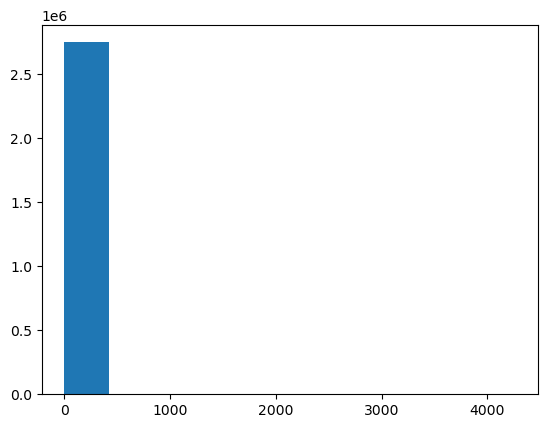

In [ ]:
 plt.hist(df['fare_amount'])

**we can see above the outlier in  above histogram, now we will see by plotting box plot**

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae8d5b3890>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae8d5c5150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae99f05fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae8d5c6750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae8d5c72d0>],
 'means': []}

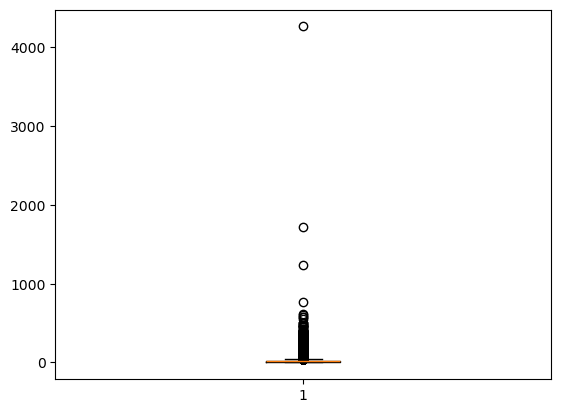

In [ ]:
 plt.boxplot(df['fare_amount'])

**in box plot we can also see outlier for removing, now we will use IQR Method because, the data is not so much normally distributed so we will not use z-score
Calculate the lower and upper bounds for defining outliers, Any values below the lower bound or above the upper bound are considered outliers**

In [ ]:
for col in ['fare_amount','trip_distance','duration']:
    q1 =df[col].quantile(0.25)
    q3 =df[col].quantile(0.75)
    IQR =q3-q1

    lower_bound =q1-1.5*IQR
    upper_bound =q3+1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

**now we will again see that outliers are removed or not**

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae8e29a590>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae8e29bd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae8e2998d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae8e2a9410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae8e2a9f90>],
 'means': []}

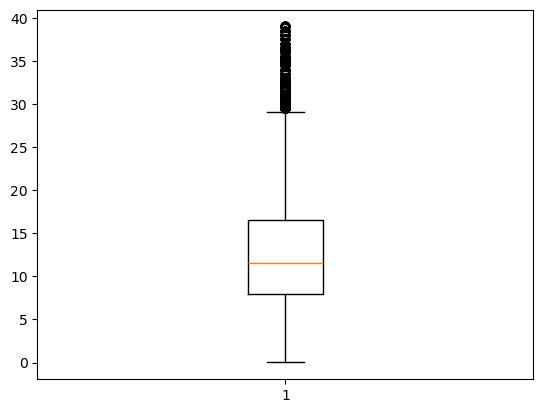

In [ ]:
 plt.boxplot(df['fare_amount'])

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


now we have fair data , now we will see on the basis of fare_amount and trip distance that, what customer prefer pay by card or cash and we will see this distribution by using histogram for trip distance and fare amount

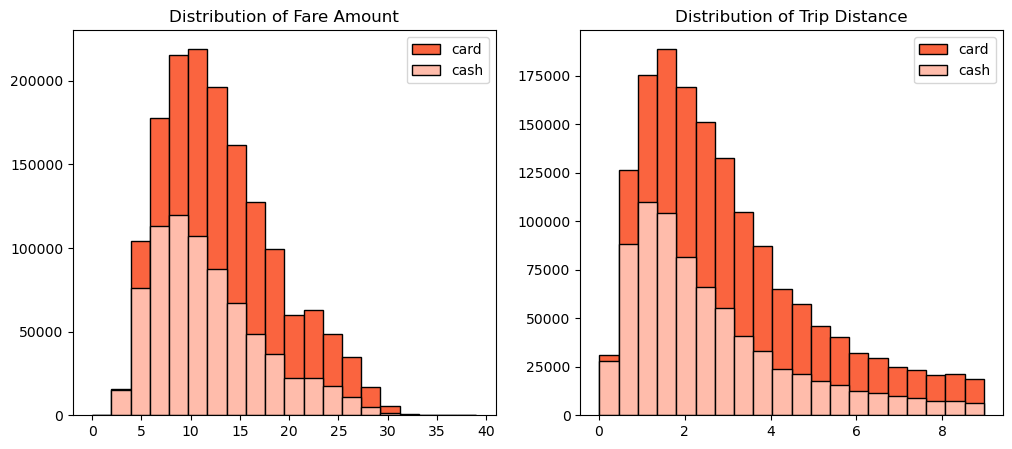

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] =='Card']['fare_amount'],histtype = 'barstacked',bins = 20, edgecolor = 'k', color = '#FA643F', label ='card')
plt.hist(df[df['payment_type'] =='Cash']['fare_amount'],histtype = 'barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label ='cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] =='Card']['trip_distance'],histtype = 'barstacked',bins = 20, edgecolor = 'k', color = '#FA643F', label ='card')
plt.hist(df[df['payment_type'] =='Cash']['trip_distance'],histtype = 'barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label ='cash')
plt.legend()
plt.show()

in above distribution we can see that when trip distance and fare amount increasing people prefer using card

to verify statically we can find mean and std for trip ditance and fare amount on basis of card and cash

In [ ]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})
# above we can see that when mean and std of fare amount and trip distance is more when card is selected

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

now to very percentage of person who prefer card and whor prefer cash in our data set, we will use pie chart/ donut chart

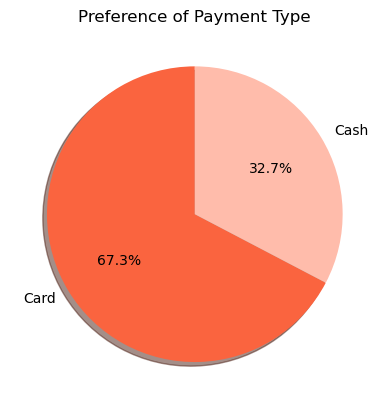

In [ ]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
            startangle = 90, shadow =True , autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

now we have payment type distribution, we have seen trip distance distribution and also we have seen fatre amound distribution, now we will see passenger count distribution

now we will see passenger count analysis with payment type

we will make stacked bar chart to show distribution of passenger count % on card and cash

In [ ]:
# firstly we will form distribution by using groupby function
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

In [ ]:
# now we are converting value into percentage
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [ ]:
df.head(1)

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.2,4.8


In [ ]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


now we will create a datafram custom, to transform these values to plot the data into stacked bar chart on the base of column 1,2,3,4,5 which are passenger count

In [ ]:
passenger_count_df = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
passenger_count_df['payment_type'] = ['Card', 'Cash']
passenger_count_df.iloc[0, 1:] = passenger_count.iloc[0:5, -1]
passenger_count_df.iloc[1, 1:] = passenger_count.iloc[5:, -1]


now are custom data frame is ready and now we will use this to form stacked bar chart

In [ ]:
passenger_count_df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


this code will provide to stacked bar cahrt and also put the percentage of diff passenger count prefering cash and card

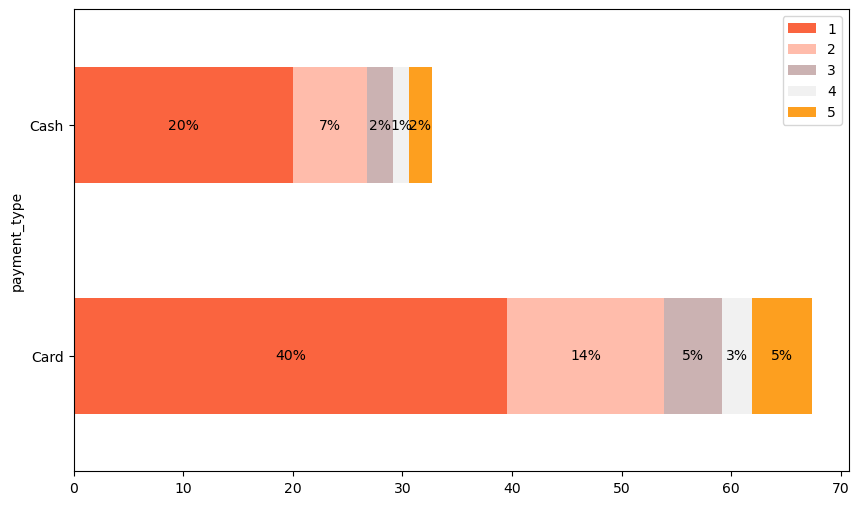

In [ ]:
fig,ax= plt.subplots(figsize=(10,6))
passenger_count_df.plot(x='payment_type',kind ='barh',stacked = True, ax= ax ,color = ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F1F'])

for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  ax.text(x + width/2,
          y + height/2,
          '{:.0f}%'.format(width),
          horizontalalignment = 'center',
          verticalalignment = 'center')


In [ ]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333


now we have done statistics and our project we did analysis of the problem statement but now we need to prove that people use card payment type more, but to proof this we need to perform hypothesis testig.

now below are null and alternate hypothesis frame

null hyppo- No = there is no average differnece between person who use cash payment type or card

alternate hypo -N1 = there is average differnece between person who use cash payment type or card

now we have two samples two independent sample whose mean ,avg etc

1- customers who pay by card

2- customers who pay by cash

now we have to decide which test/method we should use to do hypothesis

we have fare amount , which is continuous value so chi-square cannot be performed

anova also cannot be used because it is used when we have more then two groups to compare

so we left with z-test and t-test

for z test ,it require large data set,population std should be known and data should standard normal distributed

we dont know population std because we have only few customer data

so we know will check that data is standard normal distribution or not usig qqplot(quantile quantile plot)

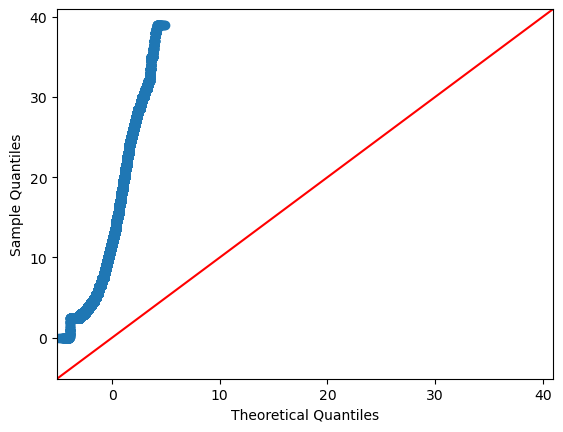

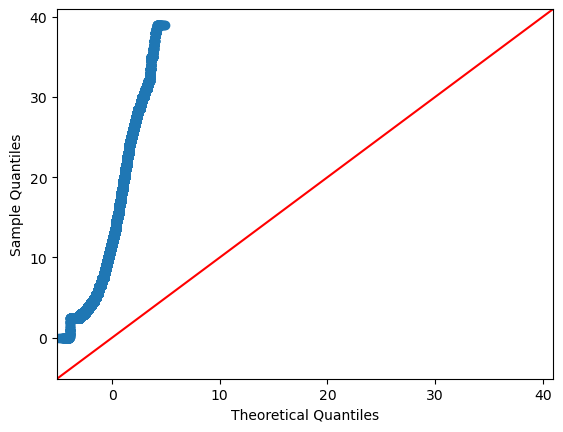

In [ ]:
sm.qqplot(df['fare_amount'], line = '45')

we can see we did qq plot,we can see that data points did not align with the sraight line which means fare amount is not standard normally distributed

so it results that we need to use T-test, as t-test is used when we have small dataset and population standard deviation is also not there

now we will make sample for t-test

In [ ]:
card_sample = df[df['payment_type']== 'Card']['fare_amount']
cash_sample = df[df['payment_type']== 'Cash']['fare_amount']

now we will use t-test formula for the test

In [ ]:
t_stats, p_value = st.ttest_ind(a=card_sample,b=cash_sample, equal_var = False)
print('T statistics',t_stats,'p_value',p_value)

T statistics 169.2111527245052 p_value 0.0


now e can easily see that value of t-stat is 169 and p_value is 0.0

means there is so much significance difference we are taking significan diff value 0.05

and our value is 0.0 which is less than 0.5



T-statistic = 169.21: This is the calculated value of the t-statistic, which represents how many standard deviations your sample mean is away from the null hypothesis mean. A high t-statistic like this (169.21) suggests that there is a very large difference between the sample mean and the hypothesized population mean, relative to the variability in your data.


p-value = 0.0: The p-value represents the probability of observing your data (or something more extreme) if the null hypothesis is true. A p-value of 0.0 (or extremely close to 0) means that the observed data is very unlikely under the null hypothesis. In practical terms, this indicates that you can reject the null hypothesis with a very high level of confidence.



which means we will reject null hypothesis
and we will accept alternate hypothesis
which is   =====there is average differnece between person who use cash payment type or card==

